# Age Model
Most of the time, when dealing with geoscientific data, one wants to add an age scale for each depth. For this application, let's look at the `AgeModel` class. We will look at 
* How to define an age model from scratch
* How to load an existing age model from a file
* How to combine age models

## Defining an Age Model
The easiest way of defining an age model is to provide an *age* and *depth* vector in the right units:

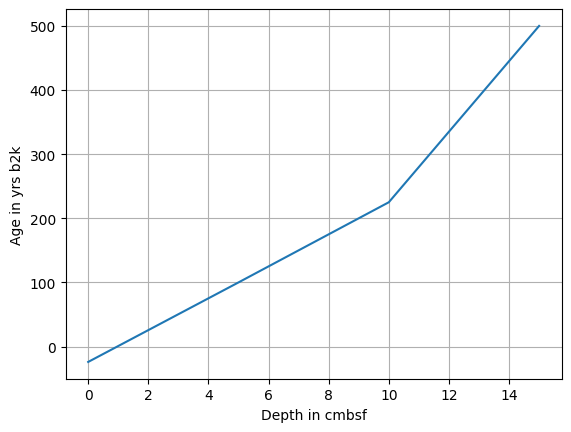

In [1]:
from msi_workflow import AgeModel

# in cm
depths = [0, 5, 10, 15]
# in years before 2000
ages = [-24, 100, 225, 500]

age_model = AgeModel(depth=depths, age=ages)

age_model.plot()

## Reading an Age Model
Another option is to provide a file from which to read an already-defined age model. The class can read csv, txt and xlsx files by wrapping the `pandas` `read_csv` and `read_xlsx` functions, so for passing additional keywords, please look at the `read_csv` documentation, if you are not reading in an excel file and the `read_xlsx` documentation otherwise.

Here is a somewhat random example from the PANGAEA database 
<span style="font-size:0.8em;">(Barron, John A; Bukry, David; Bischoff, James L (2004): (Table 1) Age calibration points for DSDP Hole 64-480 of the Guaymas Basin, Gulf of California [dataset]. PANGAEA, https://doi.org/10.1594/PANGAEA.687694, In supplement to: Barron, JA et al. (2004): High resolution paleoceanography of the Guaymas Basin, Gulf of California, during the past 15 000 years. Marine Micropaleontology, 50(3-4), 185-207, https://doi.org/10.1016/S0377-8398(03)00071-9)</span>:

In [2]:
path_age_model = r'Data\64-480_age.txt'

age_model = AgeModel(
    path_file=path_age_model, 
    sep='\t',  # entries separated by tabs
    skiprows=15  # skip commented block at the top
)

dict_keys(['save_file', 'path_folder', '_in_file', 'column_depth', 'column_age', 'df'])


Let's see if we were able to read in the table:

In [3]:
age_model.df

,Depth sed [m],Age model [ka],Ageprof dat des,Reference
0,0.00,1.33,silicoflagellate correlation w/180 cm level of...,Murray (1982)
1,1.40,2.70,Magnetic secular variation correlation,"(Harris and Karlin, written commun., 2001)"
2,2.20,3.40,Magnetic secular variation correlation,"(Harris and Karlin, written commun., 2001)"
3,5.70,6.45,Magnetic secular variation correlation,"(Harris and Karlin, written commun., 2001)"
4,7.00,7.60,Magnetic secular variation correlation,"(Harris and Karlin, written commun., 2001)"
5,7.70,8.20,Magnetic secular variation correlation,"(Harris and Karlin, written commun., 2001)"
6,10.40,11.60,Top Younger Dryas,"(Keigwin and Jones, 1990)"
7,10.51,11.83,AMS calendar age on N. deuterei,"(Keigwin and Jones, 1990)"
8,10.81,12.34,AMS calendar age on Nuttalides deuterei,"(Keigwin and Jones, 1990)"
9,11.15,12.90,Base Younger Dryas,"(Keigwin and Jones, 1990)"


In [4]:
print(age_model.column_depth, age_model.column_age)  # we were able to identify the columns automatically
print(age_model.depth)
print(age_model.age)

Depth sed [m] Age model [ka]
[ 0.    1.4   2.2   5.7   7.    7.7  10.4  10.51 10.81 11.15 13.05 13.11
 13.51]
[ 1.33  2.7   3.4   6.45  7.6   8.2  11.6  11.83 12.34 12.9  14.6  14.73
 15.45]


Looks like this worked. Sometimes you may need to specify the depth and age columns:

In [5]:
path_age_model = r'Data\64-480_age.txt'

age_model = AgeModel(
    path_file=path_age_model, 
    sep='\t',  # entries separated by tabs
    skiprows=15,  # skip commented block at the top
    column_depth='Depth sed [m]',
    column_age='Age model [ka]'
)

dict_keys(['save_file', 'path_folder', '_in_file', 'column_depth', 'column_age', 'df'])


All that remains to be done is to convert the units

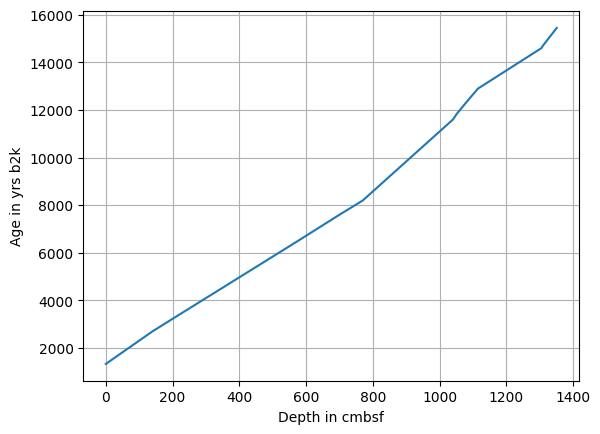

In [6]:
age_model.convert_depth_scale(100)  # multiply with factor 100 to convert m to cm
age_model.convert_age_scale(1000)  # multiply with factor 1000 to convert kyrs into yrs
age_model.plot()

## Combining Age Models
Oftentimes age models are spread out over multiple files. With the `AgeModel` class we can easily combine them into one (assuming that their depths don't overlap). This will be shown for an artificial example:

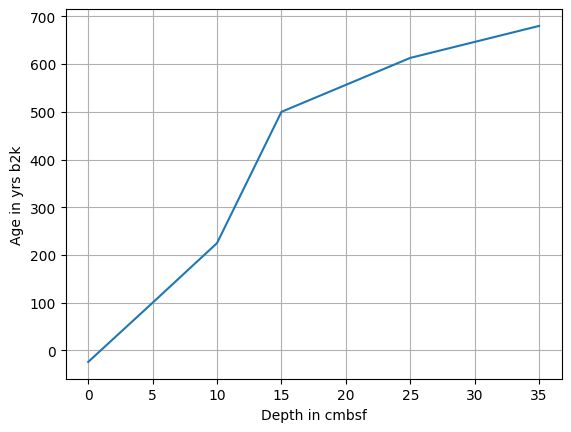

In [7]:
from msi_workflow import AgeModel

# in cm
depths1 = [0, 5, 10, 15]
# in years before 2000
ages1 = [-24, 100, 225, 500]
age_model1 = AgeModel(depth=depths1, age=ages1)

depths2 = [25, 35]
ages2 = [613, 680]

age_model2 = AgeModel(depth=depths2, age=ages2)

age_model = age_model1 + age_model2

age_model.plot()

Notice that the order matters:

In [8]:
try:
    age_model = age_model2 + age_model1
except AssertionError as e:
    print(e)

last depth of first model has to be smaller than second but is 35 and 0


## Using the Age Model
Now that we defined age models, let's put them to use. Say we have measurements along the core that don't match the points of the age model. Using the class, we can easily find the missing ages through interpolation:

In [9]:
import numpy as np
depths_core = np.linspace(1, 30, 100)
ages_core = age_model.depth_to_age(depths_core)
print(ages_core)

[  0.8          8.06464646  15.32929293  22.59393939  29.85858586
  37.12323232  44.38787879  51.65252525  58.91717172  66.18181818
  73.44646465  80.71111111  87.97575758  95.24040404 102.52525253
 109.84848485 117.17171717 124.49494949 131.81818182 139.14141414
 146.46464646 153.78787879 161.11111111 168.43434343 175.75757576
 183.08080808 190.4040404  197.72727273 205.05050505 212.37373737
 219.6969697  229.44444444 245.55555556 261.66666667 277.77777778
 293.88888889 310.         326.11111111 342.22222222 358.33333333
 374.44444444 390.55555556 406.66666667 422.77777778 438.88888889
 455.         471.11111111 487.22222222 500.68484848 503.99494949
 507.30505051 510.61515152 513.92525253 517.23535354 520.54545455
 523.85555556 527.16565657 530.47575758 533.78585859 537.0959596
 540.40606061 543.71616162 547.02626263 550.33636364 553.64646465
 556.95656566 560.26666667 563.57676768 566.88686869 570.1969697
 573.50707071 576.81717172 580.12727273 583.43737374 586.74747475
 590.0575757

## Saving and Loading
Dealing with the different file formats and units of age models can be quite annoying. Luckily we only have to do it once. First, Let's define the folder we want to save the age model to:

In [10]:
age_model.path_file = 'Data/MyModel.pickle'  # make sure the file type is pickle
age_model.save()

In [11]:
age_model.__dict__

{'save_file': 'MyModel.pickle',
 'path_folder': 'Data',
 '_in_file': 'MyModel.pickle',
 'column_depth': 'depth',
 'column_age': 'age',
 'df':    depth  age
 0      0  -24
 1      5  100
 2     10  225
 3     15  500
 4     25  613
 5     35  680}

and loading it back in 

In [15]:
age_model_loaded = AgeModel(path_file='Data/MyModel.pickle')
age_model.df

dict_keys(['save_file', 'path_folder', '_in_file', 'column_depth', 'column_age', 'df'])


,depth,age
0,0,-24
1,5,100
2,10,225
3,15,500
4,25,613
5,35,680
